In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("../data/raw/bbc-news-data.csv", sep="\t", on_bad_lines="skip")
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [8]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [9]:
# Check for missing values
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

In [10]:
# Show basic statistics (if applicable)
df.describe(include='all')

,category,filename,title,content
count,2225,2225,2225,2225
unique,5,511,2096,2092
top,sport,001.txt,Microsoft seeking spyware trojan,Microsoft has warned PC users to update their...
freq,511,5,2,2


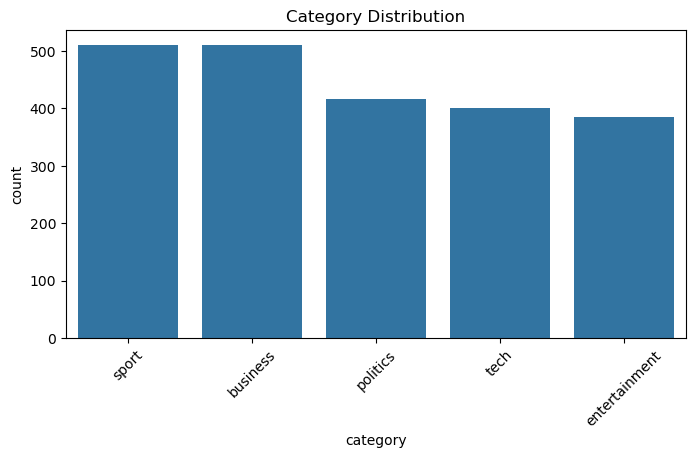

In [11]:
# Visualize class/category distribution if available
if 'category' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
    plt.title('Category Distribution')
    plt.xticks(rotation=45)
    plt.show()

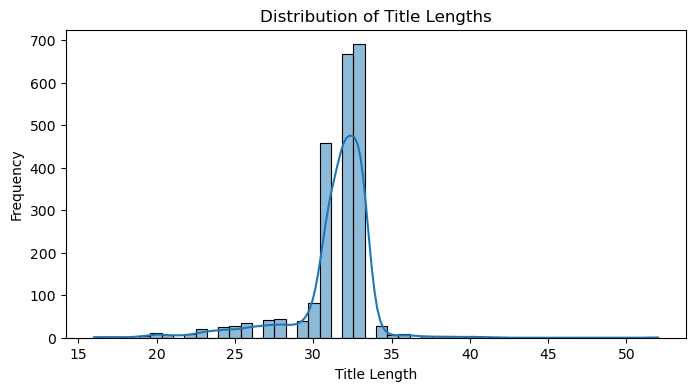

In [15]:
# Visualize the distribution of text lengths
if "title" in df.columns:
    df["text_length"] = df["title"].apply(len)
    plt.figure(figsize=(8, 4))
    sns.histplot(df["text_length"], bins=50, kde=True)
    plt.title("Distribution of Title Lengths")
    plt.xlabel("Title Length")
    plt.ylabel("Frequency")
    plt.show()


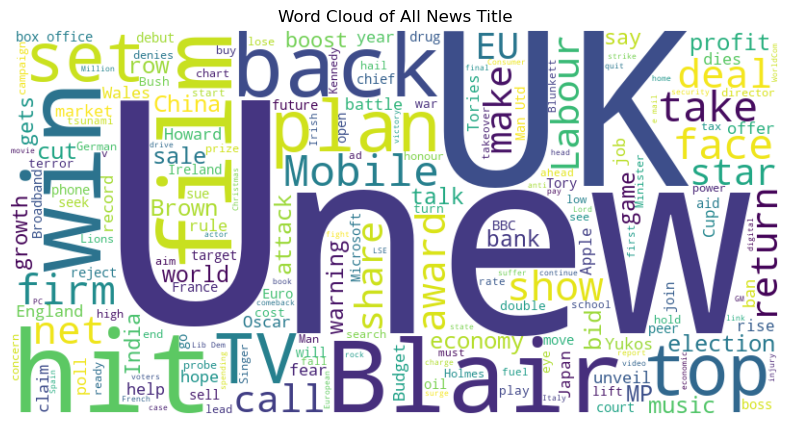

In [18]:
# Generate a word cloud for the entire dataset
from wordcloud import WordCloud, STOPWORDS

if "title" in df.columns:
    text = " ".join(df["title"].astype(str))
    wordcloud = WordCloud(
        width=800, height=400, background_color="white", stopwords=STOPWORDS
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of All News Title")
    plt.show()


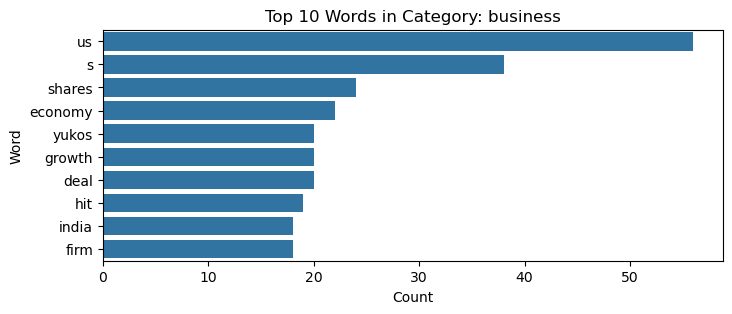

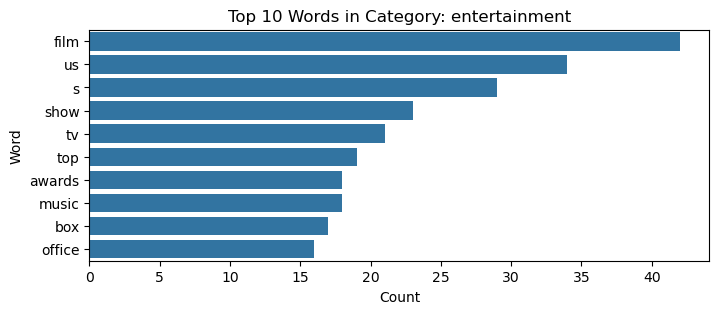

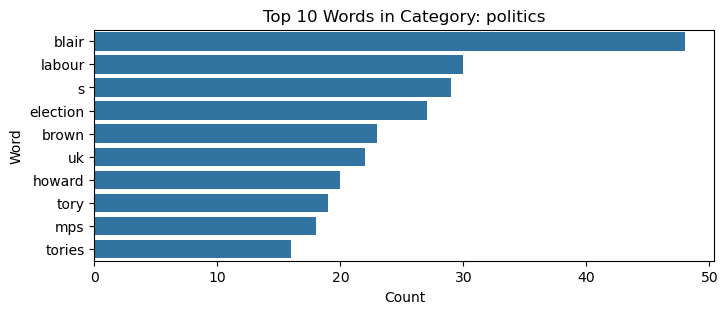

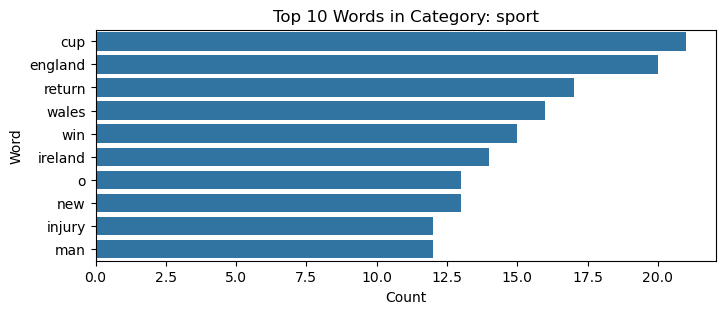

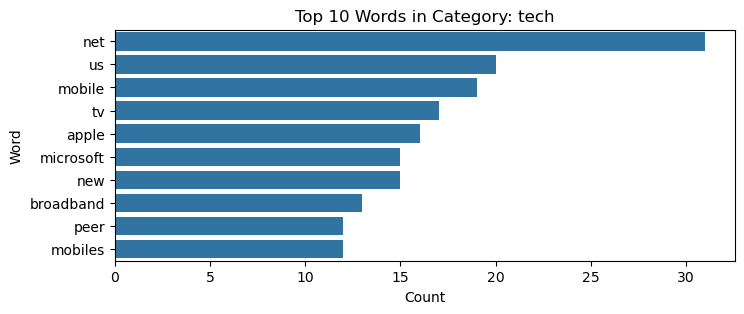

In [19]:
from collections import Counter
import re

if "category" in df.columns and "title" in df.columns:
    categories = df["category"].unique()
    for cat in categories:
        texts = df[df["category"] == cat]["title"].astype(str)
        words = " ".join(texts).lower()
        words = re.findall(r"\b\w+\b", words)
        common_words = Counter([w for w in words if w not in STOPWORDS]).most_common(10)
        labels, values = zip(*common_words)
        plt.figure(figsize=(8, 3))
        sns.barplot(x=list(values), y=list(labels))
        plt.title(f"Top 10 Words in Category: {cat}")
        plt.xlabel("Count")
        plt.ylabel("Word")
        plt.show()
